# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer

# Start Experiment Runner

In [16]:
def get_experiment_id(req, aligned, ds):
    df = pd.read_csv('../analysis/single_task_nets/single_task_exps_data/processed_experiments_data.csv')
    req_name = f"['{req.value.lower()}']"
    model_exp_id = df[(df.property_icao_reqs.str.contains(req_name, regex=False, case=False)) & 
                   (df.property_aligned == aligned) & (df.property_gt_names.str.contains(ds.value.lower()))].id.values[0]
    return model_exp_id

def get_src_files():
    src_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk('src') for f in filenames if os.path.splitext(f)[1] == '.py']
    src_files = [x for x in src_files if 'ipynb' not in x]
    return src_files

In [17]:
req = cts.ICAO_REQ.DARK_GLASSES
ds = GTName.FVC
aligned = True
aligned_str = 'aligned' if aligned else 'not_aligned'
model_name = f'{ds.value.lower()}_{aligned_str}/{req.value.lower()}'

model_exp_id = get_experiment_id(req, aligned, ds)

kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': f'Training network for {req.value.upper()} requisite',
        'tags': ['vgg16', 'ground truths', 'adamax', ds.value.lower(), 'binary_output', req.value.lower(),
                 'single_task', f'{model_exp_id}'],
        'src_files': get_src_files()
    },
    'properties': {
#         'tagger_model': OpenfaceMouth(),
#         'dl_names': {'train_validation':
#                            [DLName.VGGFACE2, DLName.CALTECH, DLName.FVC_PYBOSSA, 
#                             DLName.CVL, DLName.FEI_DB, DLName.GEORGIA_TECH, DLName.COLOR_FERET,
#                             DLName.ICPR04, DLName.IMFDB, DLName.IJBC, DLName.LFW, DLName.CASIA_WF,
#                             DLName.GENKI4K_DB],
#                       'test': [],
        #'reqs': list(cts.ICAO_REQ),
        'reqs': [req],
        'aligned': aligned,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [ds]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': False,
        'model_name': '', #f'single_task/{model_name}',
        'orig_model_experiment_id': '', #model_exp_id,
        'sample_training_data': False,
        'sample_prop': 1.
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 20,
        'early_stopping': 10,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    }
}

runner = ExperimentRunner(**kwargs)

IndexError: index 0 is out of bounds for axis 0 with size 0

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4926, 4)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 4)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 4)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4926 validated image filenames belonging to 2 classes.
Found 547 validated image filenames belonging to 2 classes.
Found 288 validated image filenames belonging to 2 classes.
TOTAL: 5761


# Use Neptune

In [8]:
runner.start_neptune()
runner.create_experiment()

-------------------- start neptune -------------------
Starting Neptune
-------------------- create experiment -------------------
Creating experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training/e/IC-537


# Labels Distribution

In [9]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Requisite: DARK_GLASSES
N_TRAIN_COMP: 4367 (88.65%)
N_TRAIN_NOT_COMP: 559 (11.35%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 493 (90.13%)
N_VALIDATION_NOT_COMP: 54 (9.87%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 253 (87.85%)
N_TEST_NOT_COMP: 35 (12.15%)
N_TEST_DUMMY: 0 (0.0%)
----


In [10]:
runner.summary_gen_labels_dist()

-------------------- summary gen labels dist -------------------
GEN_N_TRAIN_COMP: 4367 (88.65%)
GEN_N_TRAIN_NON_COMP: 559 (11.35%)
GEN_N_TRAIN_DUMMY: 0 (0.0%)
GEN_N_VALID_COMP: 493 (90.13%)
GEN_N_VALID_NON_COMP: 54 (9.87%)
GEN_N_VALID_DUMMY: 0 (0.0%)
GEN_N_TEST_COMP: 253 (87.85%)
GEN_N_TEST_NON_COMP: 35 (12.15%)
GEN_N_TEST_DUMMY: 0 (0.0%)


# Create Model

In [11]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

# Training Model

In [12]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
Epoch 1/20
76/76 [==============================] - 54s 598ms/step - loss: 0.1797 - accuracy: 0.9302 - val_loss: 0.0213 - val_accuracy: 0.9941

Epoch 00001: val_loss improved from inf to 0.02129, saving model to training_ckpt/best_model.hdf5
Epoch 2/20
76/76 [==============================] - 38s 502ms/step - loss: 0.0191 - accuracy: 0.9950 - val_loss: 0.0238 - val_accuracy: 0.9941

Epoch 00002: val_loss did not improve from 0.02129
Epoch 3/20
76/76 [==============================] - 38s 503ms/step - loss: 0.0195 - accuracy: 0.9957 - val_loss: 0.0219 - val_accuracy: 0.9961

Epoch 00003: val_loss did not improve from 0.02129
Epoch 4/20
76/76 [==============================] - 38s 504ms/step - loss: 0.0136 - accuracy: 0.9964 - val_loss: 0.0225 - val_accuracy: 0.9961

Epoch 00004: val_loss did not improve from 0.02129
Epoch 5/20
76/76 [==============================] - 38s 503ms/step - loss: 0.0152 - accuracy: 0.9

# Plots

-------------------- draw training history -------------------


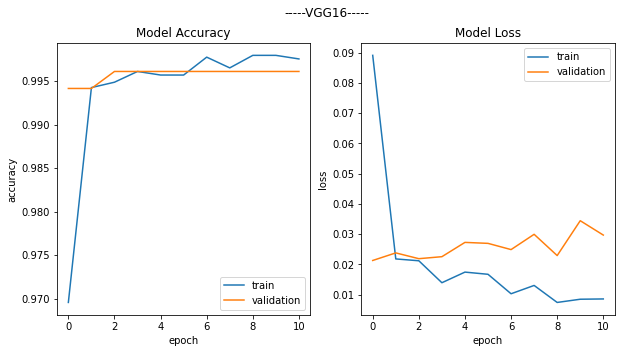

In [13]:
runner.draw_training_history()

# Load Best Model

In [14]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [15]:
runner.save_model()

-------------------- save model -------------------
Not saving model!


# Test Trained Model

## Validation Split

-------------------- test model -------------------
Testing Trained Model
Predicting labels....
9/9 [==============================] - 9s 1s/step
Prediction finished!
Requisite: DARK_GLASSES


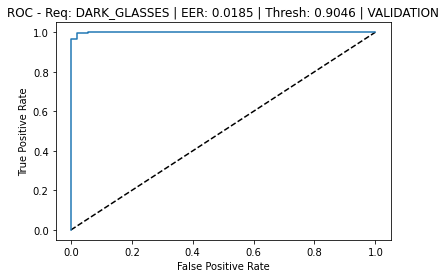

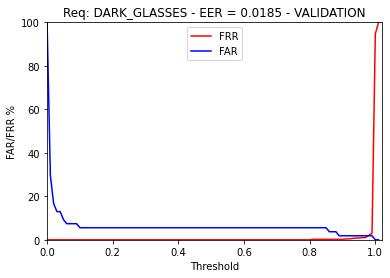

Requisite: ICAO_REQ.DARK_GLASSES - EER: 1.8499999999999999% - Best Threshold: 0.9046
Classification report -----------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       1.00      1.00      1.00       493

    accuracy                           0.99       547
   macro avg       0.98      0.99      0.98       547
weighted avg       0.99      0.99      0.99       547

Accuracy ------------------------------------------------
Model Accuracy: 99.45%
---------------------------------------------------------
Confusion matrix ----------------------------------------
FAR: 1.8499999999999999% | FRR: 0.41000000000000003% | TP: 491 | TN: 53 | FP: 1 | FN: 2


In [16]:
runner.test_model(data_src='validation')

### Vizualize Model Classification

-------------------- vizualize predictions -------------------


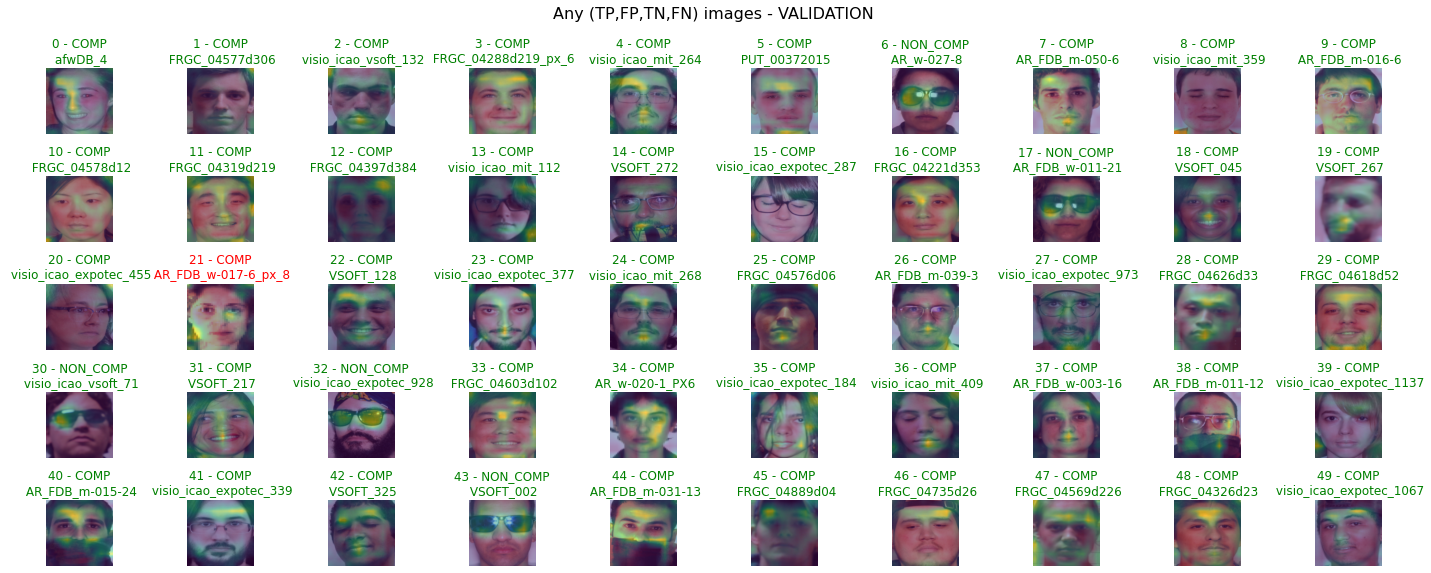

In [17]:
runner.vizualize_predictions(data_src='validation', n_imgs=50)

#### False Positives

-------------------- vizualize predictions -------------------


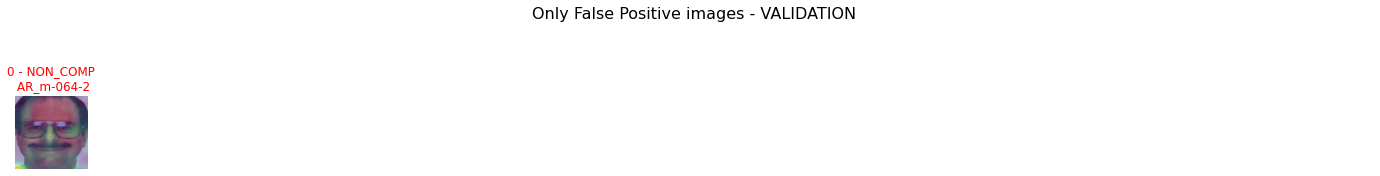

In [18]:
runner.vizualize_predictions(data_src='validation', n_imgs=50, show_only_fp=True)

#### False Negatives

-------------------- vizualize predictions -------------------


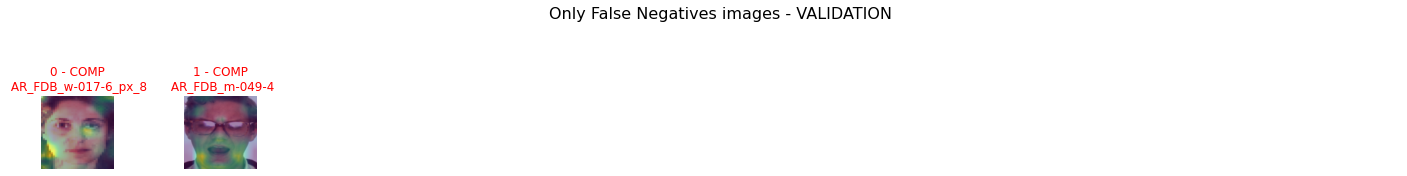

In [19]:
runner.vizualize_predictions(data_src='validation', n_imgs=50, show_only_fn=True)

#### True Positives

-------------------- vizualize predictions -------------------


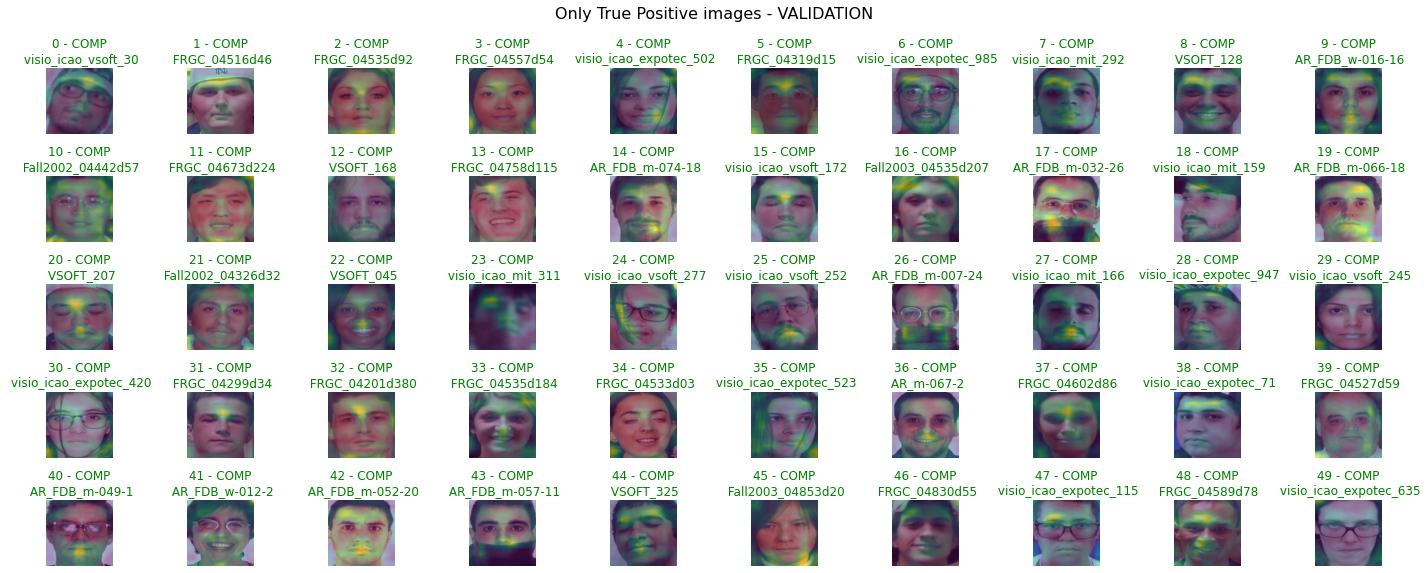

In [20]:
runner.vizualize_predictions(data_src='validation', n_imgs=50, show_only_tp=True)

#### True Negatives

-------------------- vizualize predictions -------------------


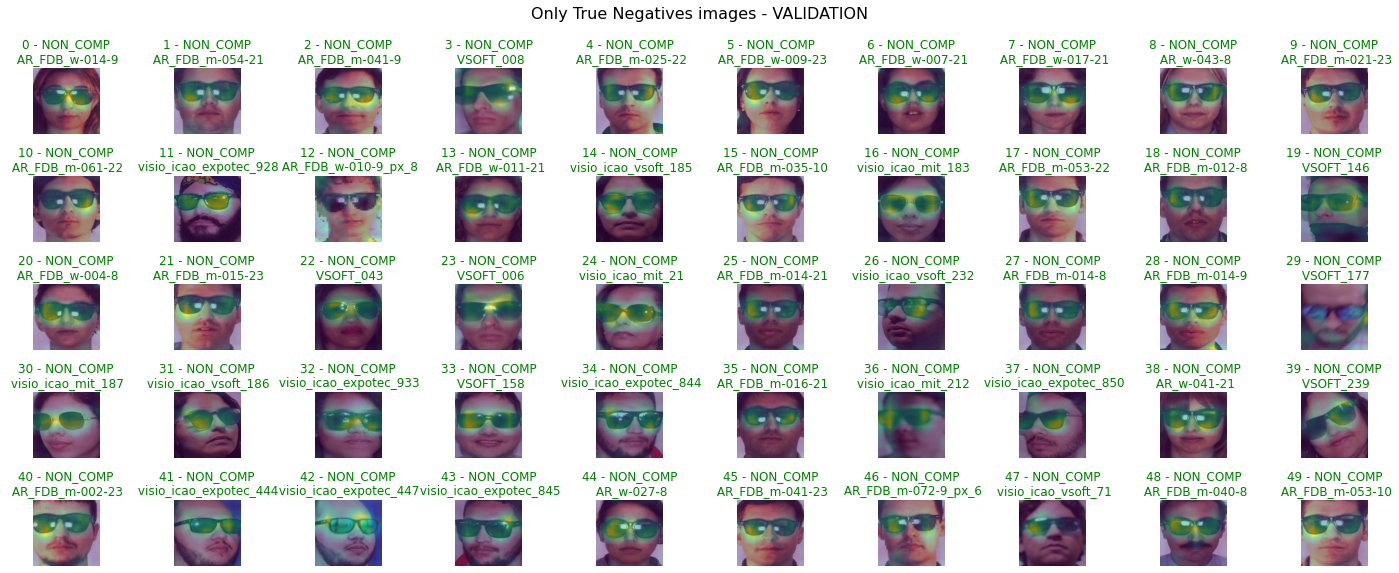

In [21]:
runner.vizualize_predictions(data_src='validation', n_imgs=50, show_only_tn=True)

## Test Split

-------------------- test model -------------------
Testing Trained Model
Predicting labels....
5/5 [==============================] - 8s 2s/step
Prediction finished!
Requisite: DARK_GLASSES


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:626: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


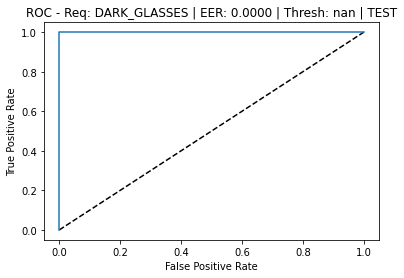

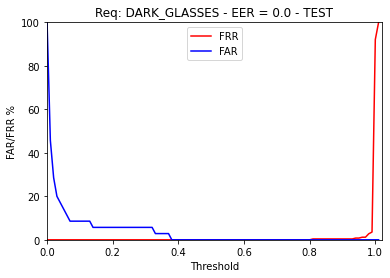

/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Requisite: ICAO_REQ.DARK_GLASSES - EER: 0.0% - Best Threshold: nan
Classification report -----------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.88      1.00      0.94       253

    accuracy                           0.88       288
   macro avg       0.44      0.50      0.47       288
weighted avg       0.77      0.88      0.82       288

Accuracy ------------------------------------------------
Model Accuracy: 87.85%
---------------------------------------------------------
Confusion matrix ----------------------------------------
FAR: 100.0% | FRR: 0.0% | TP: 253 | TN: 0 | FP: 35 | FN: 0


In [22]:
runner.test_model()

### Vizualize Model Classification

-------------------- vizualize predictions -------------------


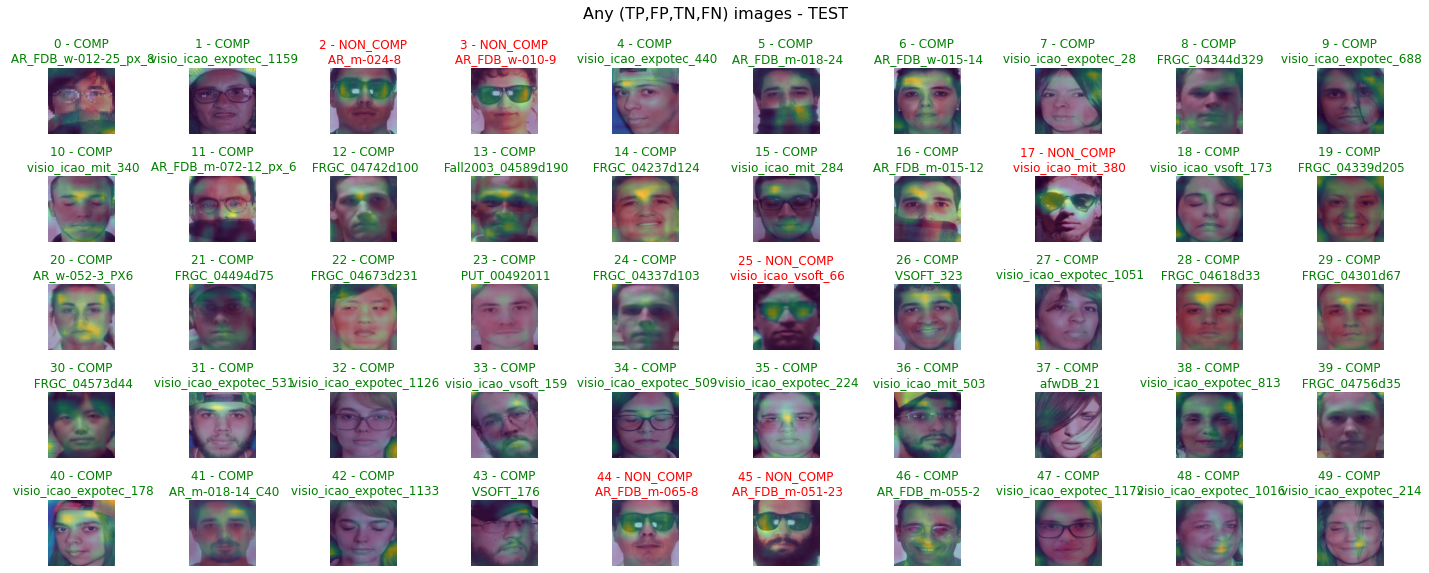

In [23]:
runner.vizualize_predictions(n_imgs=50)

#### False Positives

-------------------- vizualize predictions -------------------


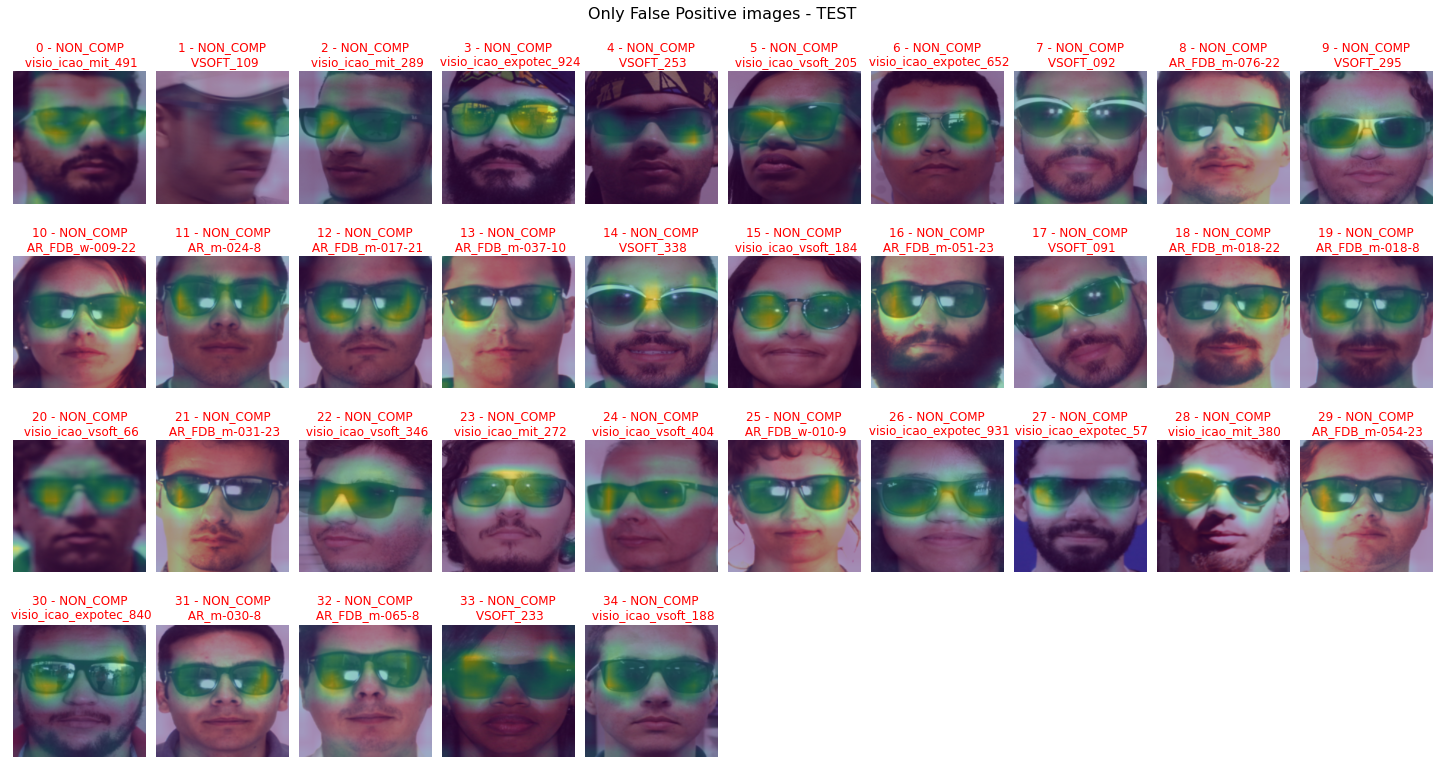

In [24]:
runner.vizualize_predictions(n_imgs=50, show_only_fp=True)

#### False Negatives

In [25]:
runner.vizualize_predictions(n_imgs=50, show_only_fn=True)

-------------------- vizualize predictions -------------------


NoChannelValue: No channel value provided.

#### True Positives

In [ ]:
runner.vizualize_predictions(n_imgs=50, show_only_tp=True)

#### True Negatives

In [ ]:
runner.vizualize_predictions(n_imgs=50, show_only_tn=True)

# Finishing Experiment Manager

In [ ]:
runner.finish_experiment()